# Control theory. Course introduction.

## TP1. System modeling. State-space representation of dynamical systems.

## Study load

Course grade breakdown:

    Labs - 40%
    
    Final project presentation 30%

    Final test 30%
    
File name for lab submission: yourname_labnumber.ipynb (example: elenavanneaux_TP1.ipynb)    

The completed notebooks should be **submitted via the corresponding Moodle assignments before the beginning of the next session.**

## Prerequisites for practice
### Math
During the course, we will cover the following areas of mathematics:
    
    1. Linear Algebra

    2. Calculus

    3. Differential equations

    4. Dynamics (Mechanics and Physics)

### Python programming
In the labs we will use a Python programming language and the following libraries:

    1. NumPy https://numpy.org/doc/stable/

    2. SciPy https://docs.scipy.org/doc/scipy/

    3. Matplotlib https://matplotlib.org/stable/tutorials/index

    4. SymPy https://docs.sympy.org/latest/tutorials/intro-tutorial/intro.html

### Jupyter Notebook Markdown Cells Documentation

Please check on Markdown cells documentation, to provide a fancy look for your notebooks!

https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html

## Ex.1: Vehicle Suspension System

Vehicle Suspension System

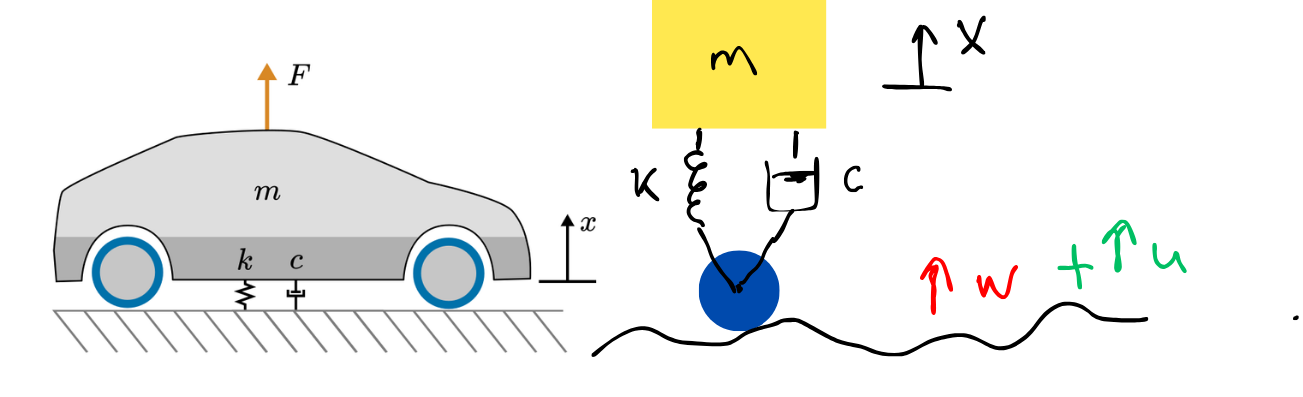

with the following system parameters:

    (m) mass 1.0 kg

    (k) spring constant 5.0 N/m

    $(c)$ damping constant 2 Ns/m

### **Equation of Motion:**

For a mass-spring-damper system, the equation of motion can be derived using Newton's second law or by applying the principles of dynamics. The general form of the equation is:

$$
m \frac{d^2x}{dt^2} + c \frac{dx}{dt} + kx = u + w
$$

### **State-Space Representation:**

To convert the second-order differential equation into a system of first-order differential equations, we introduce the following state variables:
- Let $ x_1 = x $ (position),
- Let $ x_2 = \dot x $ (velocity).

The system becomes:

$$\dot x = Ax+Bu+Dw$$

where
state vector $x = (position, velocity)$, and state and control matrices are the following:
$$ A = \begin{pmatrix} 0&1\\ -\frac{k}{m}&-\frac{c}{m}\end{pmatrix},\ B = \begin{pmatrix} 0\\ \frac{1}{m} 
\end{pmatrix},\ D =\begin{pmatrix} 0\\ \frac{1}{m} 
\end{pmatrix}$$

## TODO

Today we will study the dynamic of a passive suspension system, i.e. we assume that there is no active control ($u =0,$ for all $t>0$). 

1. Check on the code below, what kind of situation does it model?

Modify the code below to analyse how the suspension system will work on different roads.

2. Let disturbance input $w(t)$ be given by a step function
    $$w = \left\{\begin{aligned}
        &0, \quad t <3.0\\
        &1.0,  \quad 3.0 \leq t < 7.0\\
        &0,  \quad t \geq 7
    \end{aligned}\right.$$
   How will it affect the behavior of the system? What kind of road scenario is modeled with step function disturbance?
3. How will the system behavior change when we assume that there is no damper in the system (i.e., c=0)?
4. Now assume that the system is disturbed by a sinusoidal input $w = sin(t)$.
   How will it affect the behavior of the system? What kind of road profile does a sinusoidal input describe?

### Answer — Ex. 1, item 1
The original code models a **passive** suspension ($u=0$) on a **flat road** ($w(t)=0$), starting from rest. Below is a modified version to compare different road profiles.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# x is a state vector, t is a current time, A is a dynamic matrix, B is a control matrix, D is a disturbance matrix, 
# u_func(t) is a control input, w_func(t) is a disturbance input 
def StateSpace(x, t, A, B, D, u_func, w_func):
    w = w_func(t)
    u = u_func(t)
    # Flatten u and w for proper matrix operations
    return np.dot(A, x) + np.dot(B, u).flatten() + np.dot(D, w).flatten()

# OpenLoopInputOutputSystem with time-dependent w(t)
def OpenLoopInputOutputSystem(A, B, D, C, R, u_func, w_func, T, x0):
    # Solve the ODE system with odeint, passing the time-dependent w function
    solution = odeint(StateSpace, x0, T, args=(A, B, D, u_func, w_func))
    # Output calculation using C and the solution
    return (C @ solution.T)    

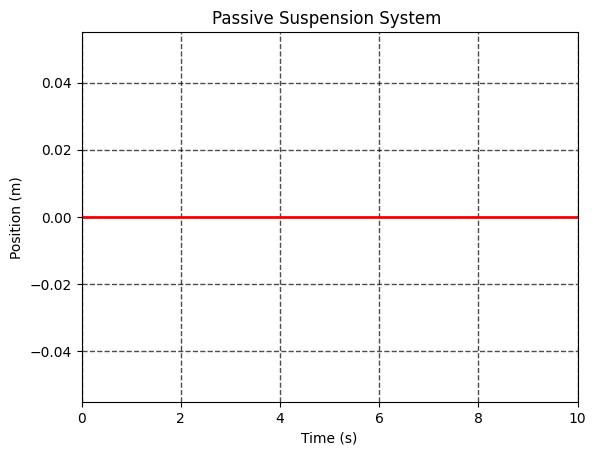

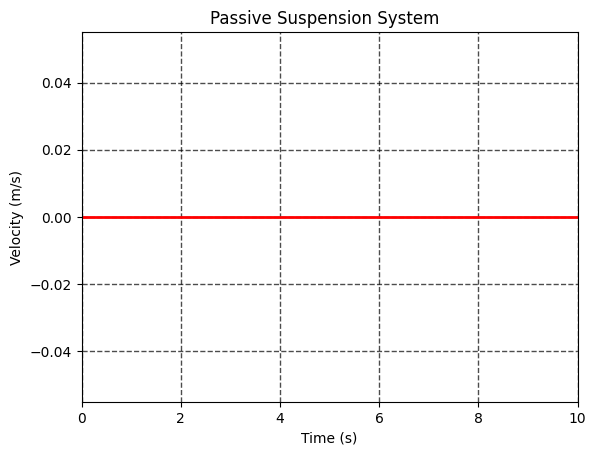

In [3]:
# System parameters
m = 1
k = 5
c = 2
g = 9.8

A = np.array([[0, 1],
              [-k/m, -c/m]])  # Corrected c instead of rho

B = np.array([[0],
              [1/m]])  # Reshaped to column vector

D = np.array([[0],
              [1/m]])  # Reshaped to column vector

C = np.array([[1, 0],[0,1]])  # Output matrix

R = np.array([0])

# flatten() to convert to 1D array since scipy.integrate.odeint requires the state vector (x) to have shape (n,), not (n,1).
x0 = np.array([0, 0]).flatten() # Initial state

# Time settings
t0 = 0  # Initial time 
tf = 10  # Final time
T = np.linspace(t0, tf, 1000)  # Time vector

def w_func(t):
    return 0.0 # Disturbance input
    
def u_func(t):
    return 0.0 # Control input

# Compute system response
y = OpenLoopInputOutputSystem(A, B, D, C, R, u_func, w_func, T, x0)

# Plot the response
plt.plot(T, y[0,:], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Position (m)')
plt.xlabel('Time (s)')
plt.title('Passive Suspension System ')
plt.show()

plt.plot(T, y[1,:], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Velocity (m/s)')
plt.xlabel('Time (s)')
plt.title('Passive Suspension System  ')
plt.show()

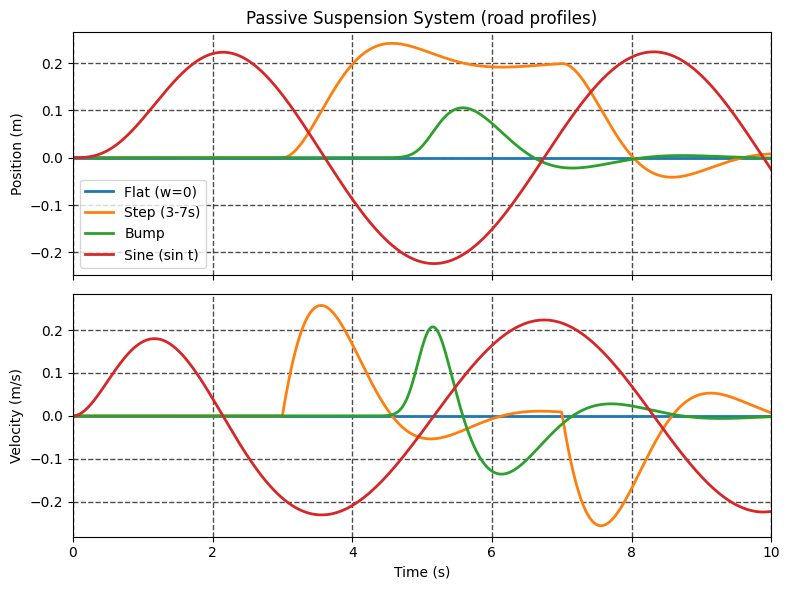

In [4]:
# Modified version (different road profiles)
def u_func(t):
    return 0.0  # Control input

# Road disturbance profiles
def w_flat(t):
    return 0.0

def w_step(t):
    # Step between 3 and 7 seconds
    return 1.0 if (t >= 3.0 and t < 7.0) else 0.0

def w_bump(t):
    # Short bump centered at t=5 (Gaussian-like)
    return np.exp(-((t - 5.0) / 0.25) ** 2)

def w_sine(t):
    return np.sin(t)

profiles = {
    "Flat (w=0)": w_flat,
    "Step (3-7s)": w_step,
    "Bump": w_bump,
    "Sine (sin t)": w_sine,
}

fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

for label, w_func in profiles.items():
    y = OpenLoopInputOutputSystem(A, B, D, C, R, u_func, w_func, T, x0)
    axes[0].plot(T, y[0, :], linewidth=2.0, label=label)
    axes[1].plot(T, y[1, :], linewidth=2.0, label=label)

axes[0].grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
axes[1].grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
axes[1].set_xlim([t0, tf])
axes[0].set_ylabel(r'Position (m)')
axes[1].set_ylabel(r'Velocity (m/s)')
axes[1].set_xlabel('Time (s)')
axes[0].set_title('Passive Suspension System (road profiles)')
axes[0].legend()
plt.tight_layout()
plt.show()

### Answer — Ex. 1, item 2
With a step disturbance, the suspension experiences a sudden displacement that causes a transient response (overshoot/oscillation) and then returns toward equilibrium when the step ends. This models a road with an abrupt height change, such as a curb/ledge or a flat-topped bump (entering and leaving a raised surface).

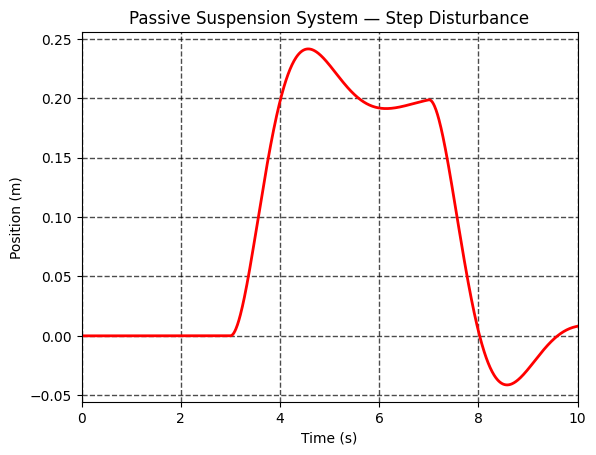

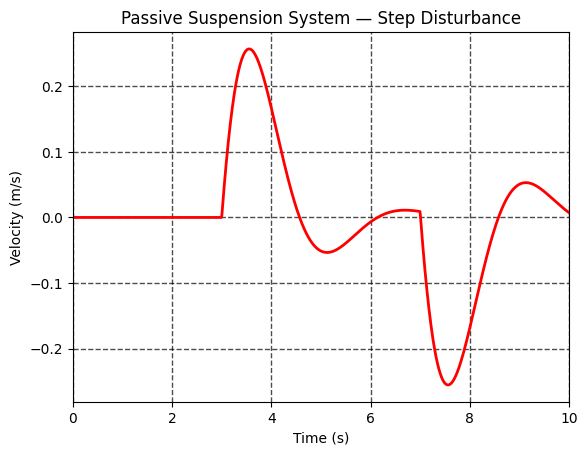

In [5]:
# Step disturbance (item 2)
def w_step(t):
    return 1.0 if (t >= 3.0 and t < 7.0) else 0.0

y_step = OpenLoopInputOutputSystem(A, B, D, C, R, u_func, w_step, T, x0)

plt.plot(T, y_step[0, :], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Position (m)')
plt.xlabel('Time (s)')
plt.title('Passive Suspension System — Step Disturbance')
plt.show()

plt.plot(T, y_step[1, :], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Velocity (m/s)')
plt.xlabel('Time (s)')
plt.title('Passive Suspension System — Step Disturbance')
plt.show()

### Answer — Ex. 1, item 3
With no damper ($c=0$), the system becomes undamped and exhibits sustained oscillations. The displacement and velocity do not decay to zero; instead, they keep oscillating at the natural frequency, making the ride less stable and less comfortable.

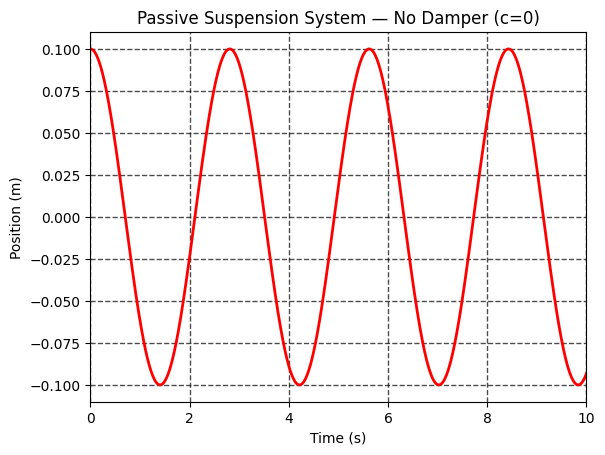

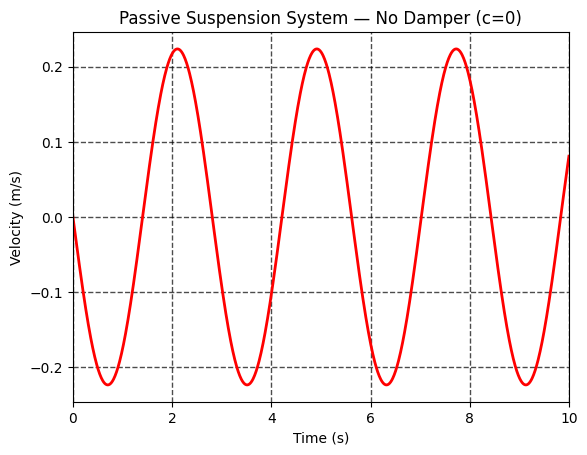

In [8]:
# No damper (c = 0)
c0 = 0
A0 = np.array([[0, 1],
               [-k/m, -c0/m]])

def w_zero(t):
    return 0.0

# Use a non-zero initial condition to show oscillations
x0_c0 = np.array([0.1, 0.0]).flatten()

y_c0 = OpenLoopInputOutputSystem(A0, B, D, C, R, u_func, w_zero, T, x0_c0)

plt.plot(T, y_c0[0, :], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Position (m)')
plt.xlabel('Time (s)')
plt.title('Passive Suspension System — No Damper (c=0)')
plt.show()

plt.plot(T, y_c0[1, :], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Velocity (m/s)')
plt.xlabel('Time (s)')
plt.title('Passive Suspension System — No Damper (c=0)')
plt.show()

### Answer — Ex. 1, item 4
A sinusoidal disturbance produces a periodic response with oscillations that follow the input frequency (plus transient effects). This represents a wavy/undulating road surface with regularly spaced bumps.

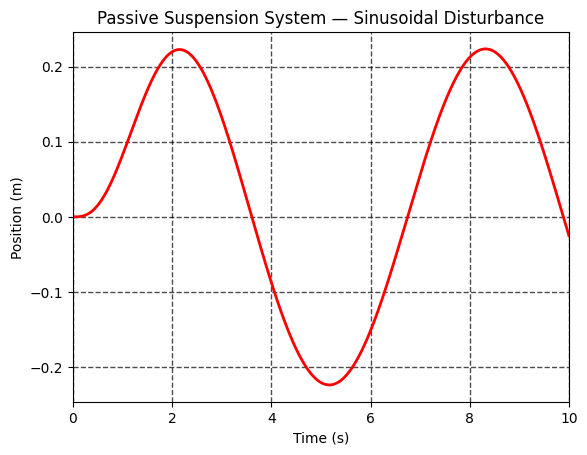

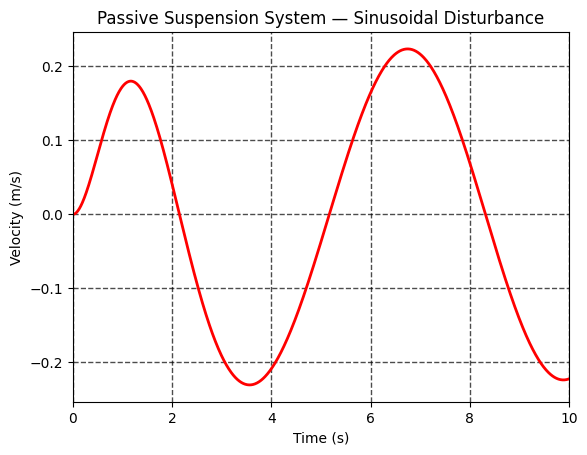

In [9]:
# Sinusoidal disturbance (item 4)
def w_sine(t):
    return np.sin(t)

y_sine = OpenLoopInputOutputSystem(A, B, D, C, R, u_func, w_sine, T, x0)

plt.plot(T, y_sine[0, :], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Position (m)')
plt.xlabel('Time (s)')
plt.title('Passive Suspension System — Sinusoidal Disturbance')
plt.show()

plt.plot(T, y_sine[1, :], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Velocity (m/s)')
plt.xlabel('Time (s)')
plt.title('Passive Suspension System — Sinusoidal Disturbance')
plt.show()

## Ex.2: DC Motor Speed: System Modeling

A common actuator in control systems is the DC motor. It directly provides rotary motion and, coupled with wheels or drums and cables, can provide translational motion. The electric equivalent circuit of the armature and the free-body diagram of the rotor are shown in the following figure.

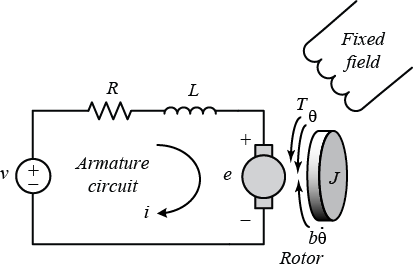

For this example, we will assume that the input of the system is the voltage source ($V$) applied to the motor's armature, while the output is the rotational speed of the shaft $\dot{\theta}$. The rotor and shaft are assumed to be rigid. We further assume a viscous friction model, that is, the friction torque is proportional to shaft angular velocity. We will assume that the magnetic field is constant and, therefore, that the motor torque is proportional (with constant $K_t$) to only the armature current. Let us remark that in SI units the motor torque and back emf constants are equal, that is, $K_t = K_e$.

The physical parameters for our example are:

    (J)   moment of inertia of the rotor     0.01 kg.m^2

    (b)     motor viscous friction constant    0.1 N.m.s

    (Ke)    electromotive force constant       0.01 V/rad/sec

    (Kt)    motor torque constant              0.01 N.m/Amp

    (R)     electric resistance                1 Ohm

    (L)     electric inductance                0.5 H

## TODO
1. Let us assume that the state vector is $x = (w,i)$ where $w = \dot\theta$ is an angular velocity of the motor. Derive the state space equations of the system. Is the system linear?
2. Rewrite the system equations in canonical first order ODE system form.
3. Simulate the output of the system corresponding to uncontrolled system (i.e V = 0) and a random initial position.
4. Let's assume that the motor is off. How will the system's behavior change if we apply 15 volts as an input?


### Answer — Ex. 2, item 1
Let the state be $x = (w, i)^T$, where $w=\dot\theta$ and $i$ is armature current. The equations are:
$$
\dot w = -\frac{b}{J} w + \frac{K_t}{J} i
$$
$$
\dot i = -\frac{K_e}{L} w - \frac{R}{L} i + \frac{1}{L} V
$$
So the state-space form is $\dot x = A x + B V$ with
$$
A=\begin{pmatrix}-\frac{b}{J} & \frac{K_t}{J} \\ -\frac{K_e}{L} & -\frac{R}{L}\end{pmatrix},\quad B=\begin{pmatrix}0\\\frac{1}{L}\end{pmatrix}.
$$
This model is linear (LTI) for constant parameters.

Derivation (in this same item):
Electrical (armature) equation:
$$
V = L\dot i + Ri + K_e w
$$
Mechanical equation (rotor):
$$
J\dot w + b w = K_t i.
$$
Solving both for $\dot i$ and $\dot w$ gives the two first‑order equations above.

### Answer — Ex. 2, item 2
Canonical first‑order ODE form:
$$
\begin{aligned}
\dot x_1 &= -\frac{b}{J}x_1 + \frac{K_t}{J}x_2 \\
\dot x_2 &= -\frac{K_e}{L}x_1 - \frac{R}{L}x_2 + \frac{1}{L}V
\end{aligned}
$$
with $x_1=w$ and $x_2=i$.

Derivation (in this same item):
Define $x_1=w$ and $x_2=i$. Substituting into the two first‑order equations from item 1 yields the canonical form above.

### Answer — Ex. 2, item 3
For $V=0$ and a non‑zero initial state, the motor’s speed decays to zero due to viscous friction and electrical losses, while the current also decays to zero. The response is a damped transient toward equilibrium $(w,i)=(0,0)$.

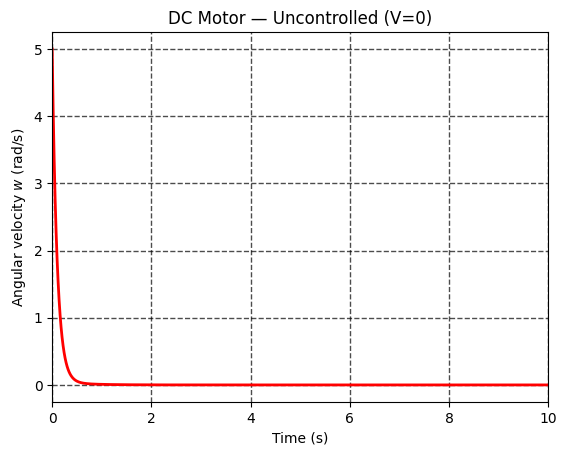

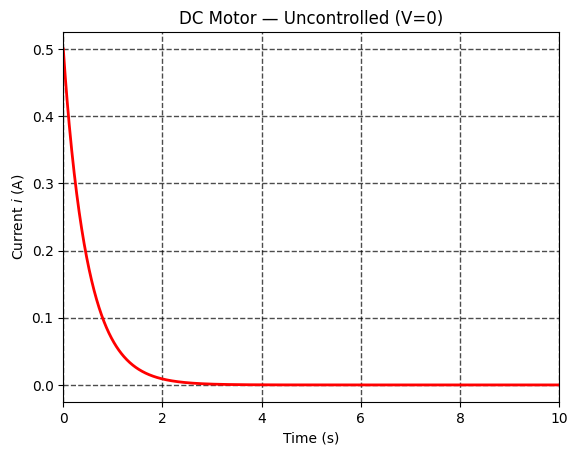

In [10]:
# Ex. 2, item 3 — simulation with V = 0
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters
J = 0.01
b = 0.1
Ke = 0.01
Kt = 0.01
R = 1.0
L = 0.5

A = np.array([[-b/J, Kt/J],
              [-Ke/L, -R/L]])
B = np.array([[0],
              [1/L]])

# Unforced input
def V_func(t):
    return 0.0

def motor_state(x, t):
    w, i = x
    dx = A @ np.array([w, i]) + B.flatten() * V_func(t)
    return dx

t0 = 0
tf = 10
T = np.linspace(t0, tf, 1000)

# Non-zero initial condition
x0 = np.array([5.0, 0.5])

x = odeint(motor_state, x0, T)

plt.plot(T, x[:, 0], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Angular velocity $w$ (rad/s)')
plt.xlabel('Time (s)')
plt.title('DC Motor — Uncontrolled (V=0)')
plt.show()

plt.plot(T, x[:, 1], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Current $i$ (A)')
plt.xlabel('Time (s)')
plt.title('DC Motor — Uncontrolled (V=0)')
plt.show()

### Answer — Ex. 2, item 4
Applying a constant $V=15\,\mathrm{V}$ drives the motor to a non‑zero steady‑state speed. The current rises quickly then settles, and the speed increases toward a steady value determined by $V$, $R$, $K_e$, and $b$.

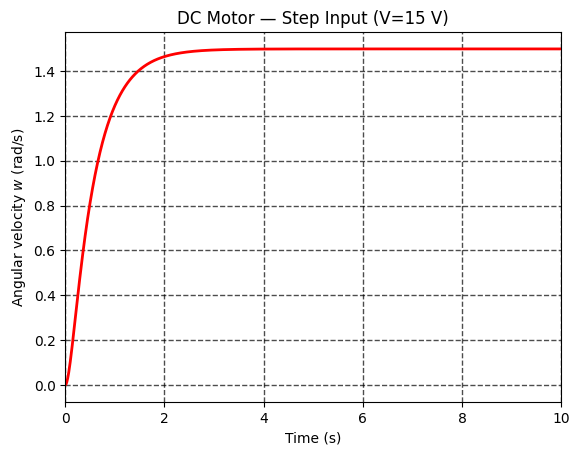

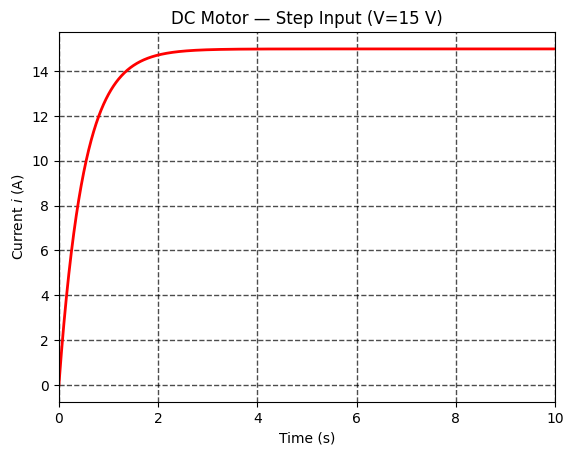

In [11]:
# Ex. 2, item 4 — simulation with V = 15 V
def V_func(t):
    return 15.0

def motor_state(x, t):
    w, i = x
    dx = A @ np.array([w, i]) + B.flatten() * V_func(t)
    return dx

t0 = 0
tf = 10
T = np.linspace(t0, tf, 1000)

x0 = np.array([0.0, 0.0])
x = odeint(motor_state, x0, T)

plt.plot(T, x[:, 0], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Angular velocity $w$ (rad/s)')
plt.xlabel('Time (s)')
plt.title('DC Motor — Step Input (V=15 V)')
plt.show()

plt.plot(T, x[:, 1], linewidth=2.0, color='red')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Current $i$ (A)')
plt.xlabel('Time (s)')
plt.title('DC Motor — Step Input (V=15 V)')
plt.show()

## Ex.3: Pendulum

Let us now consider the pendulum example from the lecture.

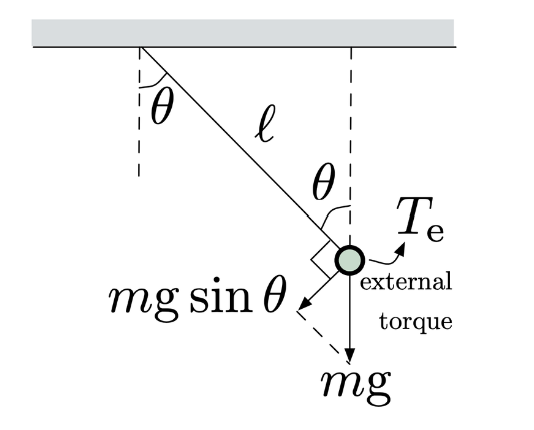

Using the free body diagram we can derive the following equation of motion.
$$ml^2*\ddot \theta = -m*g*\sin(\theta)*l +T_e$$

we then rewrite it in the canonical form
$$
\begin{aligned}
&\dot\theta_1 = \theta_2\\
&\dot\theta_2 =  -\frac{g}{l}*\sin(\theta_1) + \frac{T_e}{m*l^2}
\end{aligned}
$$
where we use the notation $\theta_1  = \theta, \theta_2 = \dot\theta_1$.

We then linearise the system around an equilibrium point ($\theta_1, \theta_2, T_e$) = (0,0,0), with a help of symbolic calculus (see the code below) and get a linear time invariant model
$$
\begin{aligned}
&\dot\theta_1 = \theta_2\\
&\dot\theta_2 =  -\frac{g}{l} + \frac{T_e}{m*l^2}
\end{aligned}
$$

## TODO
1. Let fisrt consider the system without control ($T_e = 0$). Plot the trajectories of linear and nonlinear systems for
   $\theta^0 = (0.1, 0)$ and  $\theta^0 = (1, 0).$ What kind of conclusion could you make when analyzing the simulation's result?
2. Let $\theta^0 = (0, 0)$, play with different control inputs, and look at how they affect linear and nonlinear systems correspondingly. What kind of conclusion can you make from this?

In [13]:
#profite from symbolic calculus do easy the math part
import sympy as sp
m, l, g, Te = sp.symbols('m l g Te')
theta1, theta2, dottheta2 = sp.symbols('theta1 theta2 dottheta2')

# Define the differential equations of the system
eq1 = m*l*l* dottheta2 + m*g*sp.sin(theta1)*l - Te

# Solve for the first derivative of theta1 (angular velocity)
dotthet2_sol = sp.solve(eq1, dottheta2)[0]

# Solve for the first derivative of y1 (linear velocity)
dottheta2_sol = sp.simplify(sp.solve(eq1, dottheta2)[0])

# Define the state-space representation of the system dynamics
f1 = theta2
f2 = dotthet2_sol
f = sp.Matrix([f1, f2])

# Define state and control variables
variables_x = sp.Matrix([theta1,theta2])
variables_u = sp.Matrix([Te])

# Compute the Jacobian matrices of the system
jacobian_A = sp.simplify(f.jacobian(variables_x).subs([(theta1,0), (theta2,0)]))
jacobian_B = sp.simplify(f.jacobian(variables_u).subs([(theta1,0), (theta2,0)]))

ModuleNotFoundError: No module named 'sympy'

In [14]:
jacobian_B

NameError: name 'jacobian_B' is not defined

In [5]:
jacobian_A

Matrix([
[   0, 1],
[-g/l, 0]])

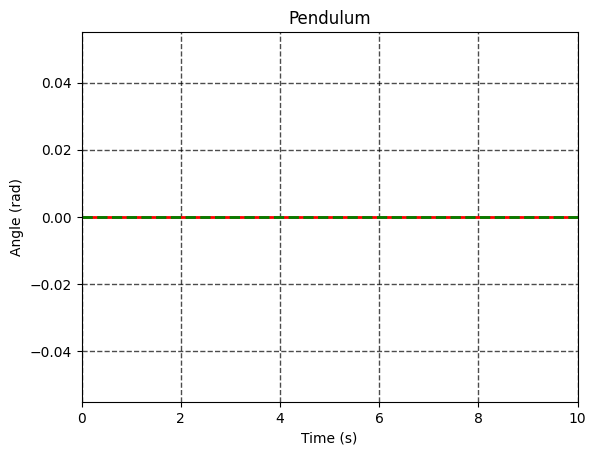

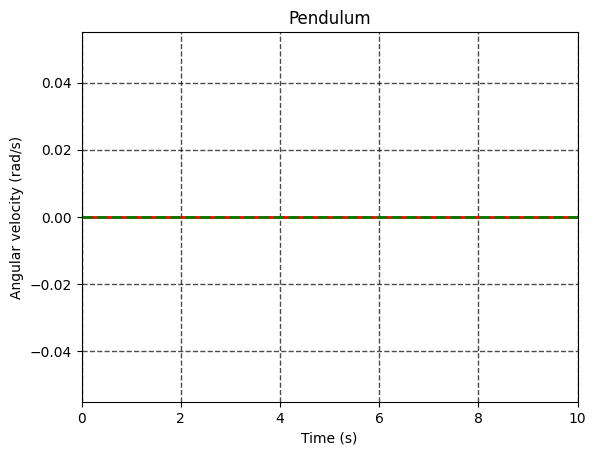

In [15]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def PendulumNonlinear(theta,t,m,l,g,Te):
    dth1 = theta[1]
    dth2 = -g/l*np.sin(theta[0]) +1/(m*l*l)*Te(t)
    return [dth1, dth2]

m = 0.1;
l = 1;
g = 9.8;

A = np.array([[0,1],[-g/l, 0]])
B = np.array([[0],
             [1]])
D = np.array([0])
C = np.array([[1,0],[0,1]])
R = np.array([0])

t0 = 0  # Initial time 
tf = 10  # Final time
T = np.linspace(t0, tf, 1000)  # Time vector

def w_func(t):
    return 0.0 # Disturbance input
    
def u_func(t):
    return 0.0 # Control input

x0 = np.array([0, 0]).flatten() # Initial state

# Compute system response
y = OpenLoopInputOutputSystem(A, B, D, C, R, u_func, w_func, T, x0)

y1 = odeint(PendulumNonlinear, x0, T, args=(m,l,g, u_func))

# Plot the response
plt.plot(T, y[0,:], linewidth=2.0, color='red')
plt.plot(T, y1[:,0], linewidth=2.0, linestyle='--',color='green')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Angle (rad)')
plt.xlabel('Time (s)')
plt.title('Pendulum')
plt.show()

plt.plot(T, y[1,:], linewidth=2.0, color='red')
plt.plot(T, y1[:,1], linewidth=2.0, linestyle='--',color='green')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
plt.xlim([t0, tf])
plt.ylabel(r'Angular velocity (rad/s)')
plt.xlabel('Time (s)')
plt.title('Pendulum')
plt.show()

### Answer — Ex. 3, item 1
For a small initial angle ($\theta^0=(0.1,0)$), the linear and nonlinear trajectories are very close, so the linear model is a good approximation. For a larger angle ($\theta^0=(1,0)$), the nonlinear response deviates significantly from the linear one, so the linearization is no longer accurate.

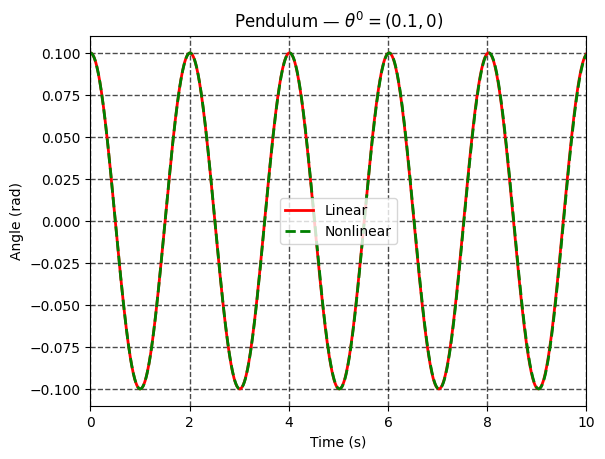

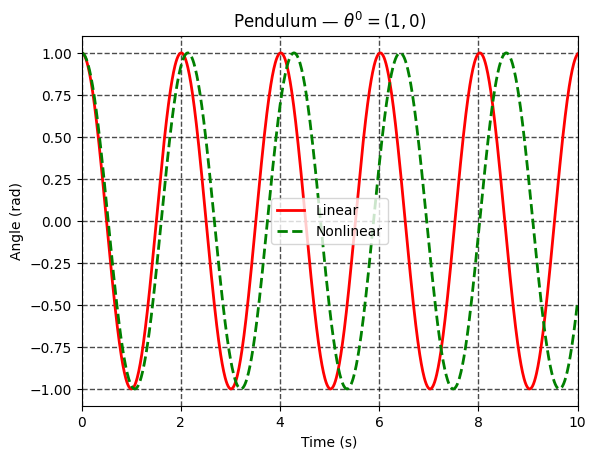

In [16]:
# Ex. 3, item 1 — compare linear vs nonlinear for two initial angles
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

m = 0.1
l = 1.0
g = 9.8

A = np.array([[0, 1],
              [-g/l, 0]])
B = np.array([[0],
              [1]])
D = np.array([0])
C = np.array([[1, 0], [0, 1]])
R = np.array([0])

t0 = 0
tf = 10
T = np.linspace(t0, tf, 1000)

def u_func(t):
    return 0.0

def w_func(t):
    return 0.0

def PendulumNonlinear(theta, t, m, l, g, Te):
    dth1 = theta[1]
    dth2 = -g/l*np.sin(theta[0]) + 1/(m*l*l)*Te(t)
    return [dth1, dth2]

def simulate(theta0, label):
    y_lin = OpenLoopInputOutputSystem(A, B, D, C, R, u_func, w_func, T, theta0)
    y_non = odeint(PendulumNonlinear, theta0, T, args=(m, l, g, u_func))

    plt.plot(T, y_lin[0, :], linewidth=2.0, color='red', label='Linear')
    plt.plot(T, y_non[:, 0], linewidth=2.0, linestyle='--', color='green', label='Nonlinear')
    plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
    plt.xlim([t0, tf])
    plt.ylabel(r'Angle (rad)')
    plt.xlabel('Time (s)')
    plt.title(f'Pendulum — {label}')
    plt.legend()
    plt.show()

simulate(np.array([0.1, 0.0]), r'$\theta^0=(0.1,0)$')
simulate(np.array([1.0, 0.0]), r'$\theta^0=(1,0)$')

### Answer — Ex. 3, item 2
With $\theta^0=(0,0)$, different control inputs produce different transient behaviors. The linear and nonlinear models agree for small inputs, but diverge as the input amplitude grows, showing the limits of linearization.

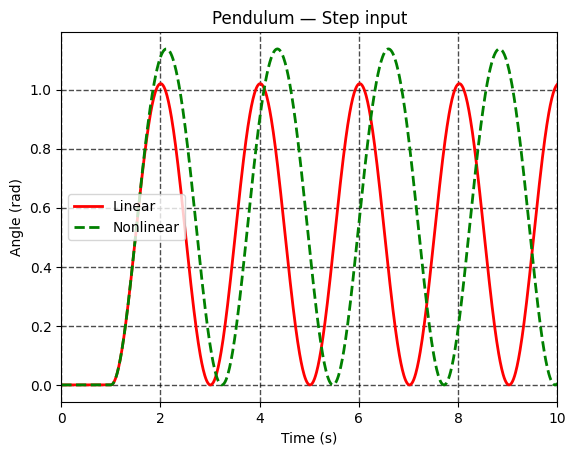

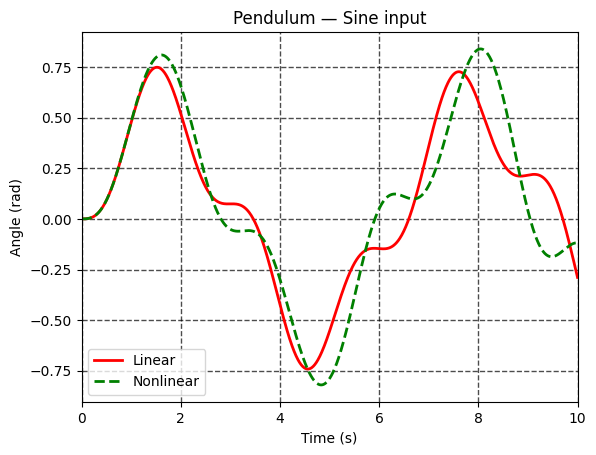

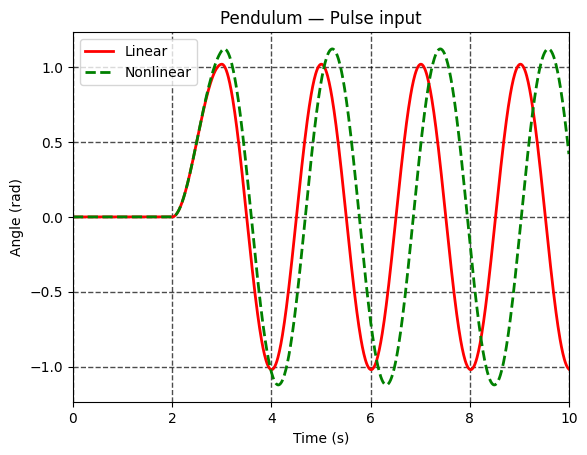

In [17]:
# Ex. 3, item 2 — compare control inputs for linear vs nonlinear
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

m = 0.1
l = 1.0
g = 9.8

A = np.array([[0, 1],
              [-g/l, 0]])
B = np.array([[0],
              [1/(m*l*l)]])

t0 = 0
tf = 10
T = np.linspace(t0, tf, 1000)

def Te_step(t):
    return 0.5 if t >= 1.0 else 0.0

def Te_sine(t):
    return 0.5 * np.sin(t)

def Te_pulse(t):
    return 0.5 if (t >= 2.0 and t <= 3.0) else 0.0

inputs = {
    "Step": Te_step,
    "Sine": Te_sine,
    "Pulse": Te_pulse,
}

def PendulumNonlinear(theta, t, m, l, g, Te):
    dth1 = theta[1]
    dth2 = -g/l*np.sin(theta[0]) + 1/(m*l*l)*Te(t)
    return [dth1, dth2]

def simulate_input(Te, label):
    # Linear model
    def lin_state(x, t):
        return (A @ x + B.flatten() * Te(t))
    x_lin = odeint(lin_state, np.array([0.0, 0.0]), T)

    # Nonlinear model
    x_non = odeint(PendulumNonlinear, np.array([0.0, 0.0]), T, args=(m, l, g, Te))

    plt.plot(T, x_lin[:, 0], linewidth=2.0, color='red', label='Linear')
    plt.plot(T, x_non[:, 0], linewidth=2.0, linestyle='--', color='green', label='Nonlinear')
    plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
    plt.xlim([t0, tf])
    plt.ylabel(r'Angle (rad)')
    plt.xlabel('Time (s)')
    plt.title(f'Pendulum — {label} input')
    plt.legend()
    plt.show()

for label, Te in inputs.items():
    simulate_input(Te, label)

## Ex 4. Dynamic modeling of an inverted pendulum on the cart

The system in this example consists of an inverted pendulum mounted to a motorized cart. The inverted pendulum system is an example commonly found in control system textbooks and research literature. Its popularity derives in part from the fact that it is unstable without control, that is, the pendulum will simply fall over if the cart isn't moved to balance it. Additionally, the dynamics of the system are nonlinear. The objective of the control system is to balance the inverted pendulum by applying a force to the cart that the pendulum is attached to. A real-world example that relates directly to this inverted pendulum system is the attitude control of a booster rocket at takeoff.

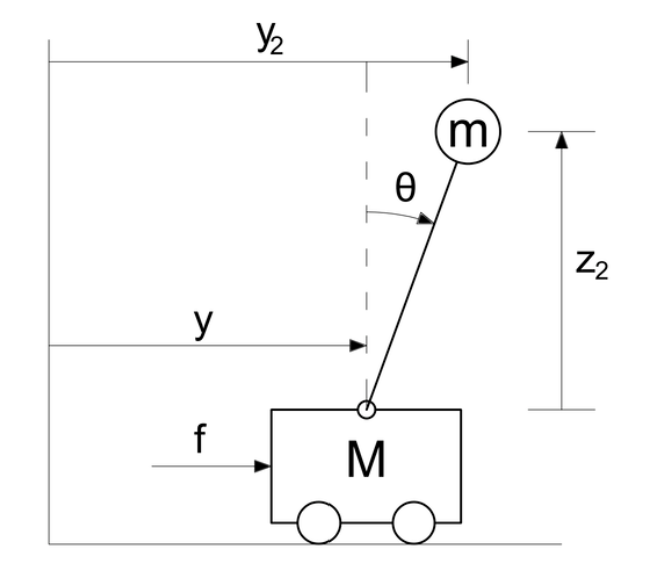

Let us consider the system with the following system parameters
    
    (M)       mass of the cart                         0.5 kg
    
    (m)       mass of the pendulum                     0.2 kg
    
    (l)       length to pendulum center of mass        0.3 m
    
    (b)       coefficient of friction for cart         0.1 N/m/sec
    
    (I)       mass moment of inertia of the pendulum   0.006 kg.m^2
    
    (F)       force applied to the cart
    
    (y)       cart position coordinates
    
    (theta)   angle between the pendulum and the vertical axis

## TODO
1) Show that the inverted pendulum on the cart can be modeled as follows

$$(M+m)\ddot{y} + b\dot{y} + ml\ddot{\theta}\cos\theta -ml\dot\theta^2\sin(\theta) = F$$
$$ml\cos(\theta)\ddot{y} + (I+ml^2)\ddot{\theta} - mgl\sin\theta = 0$$

If you find it difficult to derive the equations yourself, please, watch the following video: 
https://www.youtube.com/watch?v=kXLjs5aW2uE

or, alternatively, check the following tutorial https://ctms.engin.umich.edu/CTMS/index.php?example=InvertedPendulum&section=SystemModeling

2) Rewrite the system equation in a canonical form $\dot x = f(x,u),$ where state vector $x = (y,\theta,\dot y,\dot\theta)$.

3) Find an equlibrium point. Linearise the system equations by finding the Jacobian matrix.

4) Simulate trajectories of the uncontrolled nonlinear system and its linear approximation for different initial vectors. What can you say about system dynamics?


### Answer — Ex. 4, item 1
Using Newton’s laws (or Lagrange’s method) with forces on the cart and torque balance on the pendulum yields the coupled nonlinear equations:
$$
(M+m)\ddot{y} + b\dot{y} + ml\ddot{\theta}\cos\theta - ml\dot{\theta}^2\sin\theta = F
$$
$$
ml\cos\theta\,\ddot{y} + (I+ml^2)\ddot{\theta} - mgl\sin\theta = 0,
$$
which match the model given in the statement.

### Answer — Ex. 4, item 2
Let $x=(y,\theta,\dot y,\dot\theta)^T$, so $x_3=\dot y$ and $x_4=\dot\theta$. Using the two equations in item 1 and solving for $\ddot y$ and $\ddot\theta$ gives $\dot x = f(x,u)$ with
$$
\dot x_1 = x_3,\quad \dot x_2 = x_4,
$$
and
$$
\dot x_3=\ddot y,\quad \dot x_4=\ddot\theta,
$$
given by the expressions returned above.

In [4]:
# Ex. 4, item 2 — canonical form x_dot = f(x,u)
import sympy as sp

M, m, l, b, I, g, F = sp.symbols('M m l b I g F')
y, th, dy, dth = sp.symbols('y th dy dth')
ddy, ddth = sp.symbols('ddy ddth')

# Equations from the model
eq1 = sp.Eq((M + m)*ddy + b*dy + m*l*ddth*sp.cos(th) - m*l*dth**2*sp.sin(th), F)
eq2 = sp.Eq(m*l*sp.cos(th)*ddy + (I + m*l**2)*ddth - m*g*l*sp.sin(th), 0)

# Solve for accelerations
sol = sp.solve([eq1, eq2], (ddy, ddth), simplify=True)
ddy_expr = sp.simplify(sol[ddy])
ddth_expr = sp.simplify(sol[ddth])

# State vector x = (y, th, dy, dth)
x_dot = sp.Matrix([dy, dth, ddy_expr, ddth_expr])
x_dot

Matrix([
[                                                                                                                                                               dy],
[                                                                                                                                                              dth],
[(F*I + F*l**2*m - I*b*dy + I*dth**2*l*m*sin(th) - b*dy*l**2*m + dth**2*l**3*m**2*sin(th) - g*l**2*m**2*sin(2*th)/2)/(I*M + I*m + M*l**2*m + l**2*m**2*sin(th)**2)],
[                     l*m*(-2*F*cos(th) + 2*M*g*sin(th) + 2*b*dy*cos(th) - dth**2*l*m*sin(2*th) + 2*g*m*sin(th))/(2*(I*M + I*m + M*l**2*m + l**2*m**2*sin(th)**2))]])

### Answer — Ex. 4, item 3
An equilibrium is $\theta^*=0$, $\dot y^*=0$, $\dot\theta^*=0$, with $F^*=0$ and any constant $y^*$. Linearizing $\dot x=f(x,u)$ around this point gives the Jacobian $A=\left.\frac{\partial f}{\partial x}\right|_{x^*}$; the matrix printed above is the linearized system matrix.

In [5]:
# Ex. 4, item 3 — equilibrium and Jacobian (linearization)
# Equilibrium: theta=0, dy=0, dth=0, F=0 (y can be any constant)
x = sp.Matrix([y, th, dy, dth])
x_dot = sp.Matrix([dy, dth, ddy_expr, ddth_expr])

A = sp.simplify(x_dot.jacobian(x))
A_eq = sp.simplify(A.subs({th: 0, dy: 0, dth: 0, F: 0}))
A_eq

Matrix([
[0,                                    0,                                      1, 0],
[0,                                    0,                                      0, 1],
[0,  -g*l**2*m**2/(I*M + I*m + M*l**2*m), -b*(I + l**2*m)/(I*M + I*m + M*l**2*m), 0],
[0, g*l*m*(M + m)/(I*M + I*m + M*l**2*m),           b*l*m/(I*M + I*m + M*l**2*m), 0]])

### Answer — Ex. 4, item 4
The uncontrolled inverted pendulum is unstable around the upright equilibrium. For small initial angles, the linear and nonlinear trajectories agree briefly, but both diverge from equilibrium; for larger initial angles, the nonlinear response departs sooner, showing the limits of the linear approximation.

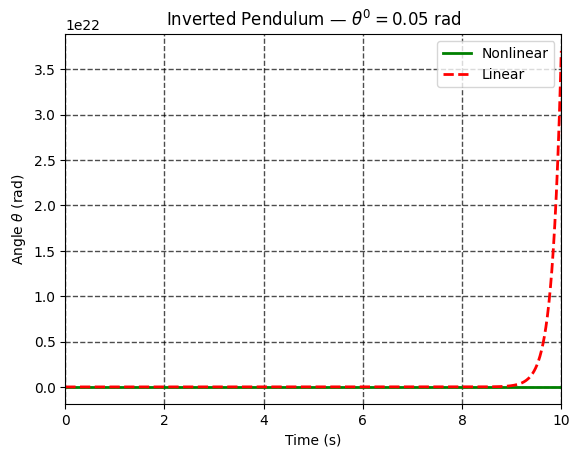

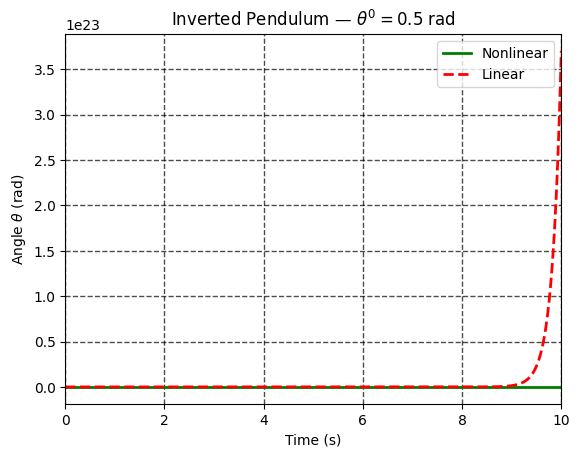

In [6]:
# Ex. 4, item 4 — nonlinear vs linear trajectories
import numpy as np
import sympy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters
M_val = 0.5
m_val = 0.2
l_val = 0.3
b_val = 0.1
I_val = 0.006
g_val = 9.8
F_val = 0.0

# Symbolic expressions (from item 2)
M, m, l, b, I, g, F = sp.symbols('M m l b I g F')
y, th, dy, dth = sp.symbols('y th dy dth')
ddy, ddth = sp.symbols('ddy ddth')

eq1 = sp.Eq((M + m)*ddy + b*dy + m*l*ddth*sp.cos(th) - m*l*dth**2*sp.sin(th), F)
eq2 = sp.Eq(m*l*sp.cos(th)*ddy + (I + m*l**2)*ddth - m*g*l*sp.sin(th), 0)

sol = sp.solve([eq1, eq2], (ddy, ddth), simplify=True)
ddy_expr = sp.simplify(sol[ddy])
ddth_expr = sp.simplify(sol[ddth])

# Lambdify nonlinear dynamics
ddy_fun = sp.lambdify((y, th, dy, dth, F, M, m, l, b, I, g), ddy_expr, 'numpy')
ddth_fun = sp.lambdify((y, th, dy, dth, F, M, m, l, b, I, g), ddth_expr, 'numpy')

def nonlinear_state(x, t):
    y_, th_, dy_, dth_ = x
    ddy_ = ddy_fun(y_, th_, dy_, dth_, F_val, M_val, m_val, l_val, b_val, I_val, g_val)
    ddth_ = ddth_fun(y_, th_, dy_, dth_, F_val, M_val, m_val, l_val, b_val, I_val, g_val)
    return [dy_, dth_, ddy_, ddth_]

# Linearized A at upright equilibrium
x_vec = sp.Matrix([y, th, dy, dth])
x_dot = sp.Matrix([dy, dth, ddy_expr, ddth_expr])
A = sp.simplify(x_dot.jacobian(x_vec))
A_eq = sp.simplify(A.subs({th: 0, dy: 0, dth: 0, F: 0}))
A_num = np.array(A_eq.subs({M: M_val, m: m_val, l: l_val, b: b_val, I: I_val, g: g_val}), dtype=float)

def linear_state(x, t):
    return (A_num @ x)

# Time vector
t0 = 0
tf = 10
T = np.linspace(t0, tf, 1000)

def simulate(x0, label):
    x_non = odeint(nonlinear_state, x0, T)
    x_lin = odeint(linear_state, x0, T)

    plt.plot(T, x_non[:, 1], linewidth=2.0, color='green', label='Nonlinear')
    plt.plot(T, x_lin[:, 1], linewidth=2.0, linestyle='--', color='red', label='Linear')
    plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
    plt.xlim([t0, tf])
    plt.ylabel(r'Angle $\theta$ (rad)')
    plt.xlabel('Time (s)')
    plt.title(f'Inverted Pendulum — {label}')
    plt.legend()
    plt.show()

simulate(np.array([0.0, 0.05, 0.0, 0.0]), r'$\theta^0=0.05$ rad')
simulate(np.array([0.0, 0.5, 0.0, 0.0]), r'$\theta^0=0.5$ rad')